<a href="https://colab.research.google.com/github/s-kp/CapstoneProject-MLRegression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Defining url of saved csv file
path = 'https://drive.google.com/uc?id=1Tl--fvtuxxdTwY5cBUNnN9y2-EO2OTLc'

# Importing dataset to create a dataframe
df = pd.read_csv(path,encoding = 'latin',parse_dates=['Date'])

In [3]:
# Checking shape pf dataframe
df.shape

(8760, 14)

In [4]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
# Renaming Columns
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [6]:
# Checking top 5 records in dataframe
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Checking bottom 5 records in dataframe
df.tail()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8760 non-null   datetime64[ns]
 1   bike_count       8760 non-null   int64         
 2   hour             8760 non-null   int64         
 3   temp             8760 non-null   float64       
 4   humidity         8760 non-null   int64         
 5   wind             8760 non-null   float64       
 6   visibility       8760 non-null   int64         
 7   dew_temp         8760 non-null   float64       
 8   sunlight         8760 non-null   float64       
 9   rain             8760 non-null   float64       
 10  snow             8760 non-null   float64       
 11  season           8760 non-null   object        
 12  holiday          8760 non-null   object        
 13  functioning_day  8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(

In [9]:
df.describe(percentiles=[.01,.25,.5,.75,.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
bike_count,8760.0,704.602055,644.997468,0.0,0.000,191.00,504.50,1065.25,2526.23,3556.00
hour,8760.0,11.500000,6.922582,0.0,0.000,5.75,11.50,17.25,23.00,23.00
temp,8760.0,12.882922,11.944825,-17.8,-12.741,3.50,13.70,22.50,35.10,39.40
humidity,8760.0,58.226256,20.362413,0.0,17.000,42.00,57.00,74.00,97.00,98.00
wind,8760.0,1.724909,1.036300,0.0,0.100,0.90,1.50,2.30,4.70,7.40
visibility,8760.0,1436.825799,608.298712,27.0,173.000,940.00,1698.00,2000.00,2000.00,2000.00
dew_temp,8760.0,4.073813,13.060369,-30.6,-24.800,-4.70,5.10,14.80,24.70,27.20
sunlight,8760.0,0.569111,0.868746,0.0,0.000,0.00,0.01,0.93,3.17,3.52
rain,8760.0,0.148687,1.128193,0.0,0.000,0.00,0.00,0.00,4.00,35.00
snow,8760.0,0.075068,0.436746,0.0,0.000,0.00,0.00,0.00,2.50,8.80


In [10]:
# Missing data counts
df.isnull().sum()

date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
sunlight           0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

In [11]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


## **EDA**

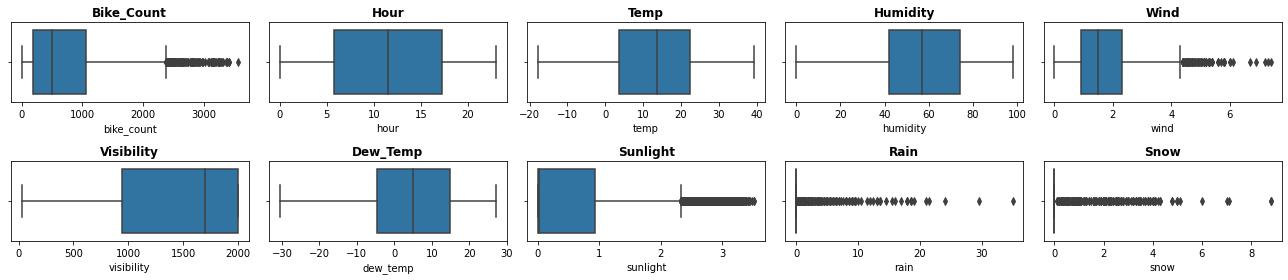

In [12]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

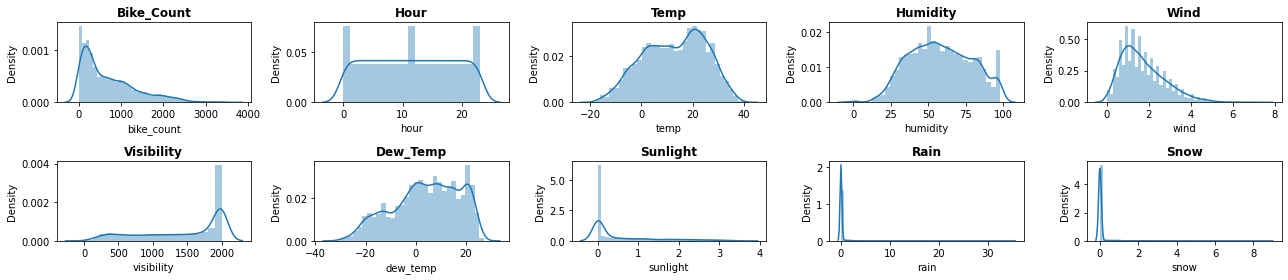

In [13]:
# Visualizing the distributions.
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

We see outliers only on the upper side of the few columns such as Wind speed, Solar Radiation, Rainfall, Snowfall but lets not treat them because these events are rare and are not outliers.




##**Cleaning and Manipulating dataset**

In [14]:
# Extracting new features from date column
df['weekend'] = df['date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )

In [15]:
# Dropping the Date column
df.drop(columns=['date'], inplace = True)

In [16]:
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['season', 'holiday', 'functioning_day']

In [17]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: season, dtype: int64 

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64 

Yes    8465
No      295
Name: functioning_day, dtype: int64 



In [18]:
# Checking average bike demand in each hour in a day.
df[['hour','bike_count']].groupby('hour').mean('bike_count').reset_index()

,hour,bike_count
0,0,541.460274
1,1,426.183562
2,2,301.630137
3,3,203.331507
4,4,132.591781
5,5,139.082192
6,6,287.564384
7,7,606.005479
8,8,1015.701370
9,9,645.983562


Based on the above distributuion of bike demands over different hours in a day, we can define an encoder for the hour column by assigning relevant weights to the hours.

In [19]:
# Defining a label encoder based on above data
encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'functioning_day':{'Yes':1, 'No': 0},
          'hour': {0: 5, 1: 4, 2: 3, 3: 2, 4: 1, 5: 1, 6: 3, 7: 6, 8: 10, 9: 6,10: 5, 11: 6,
                   12: 7, 13: 7, 14: 8,15: 8, 16: 9,17: 11, 18: 15,19: 12, 20: 11, 21: 10, 22: 9, 23: 7}}

In [20]:
# Label Encoding
df = df.replace(encoder)

# One Hot Encoding
df = pd.get_dummies(df, columns=["season"], prefix='', prefix_sep='')

In [21]:
# New look
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,holiday,functioning_day,weekend,Autumn,Spring,Summer,Winter
0,254,5,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,1
1,204,4,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,1
2,173,3,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,1
3,107,2,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,1
4,78,1,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,1


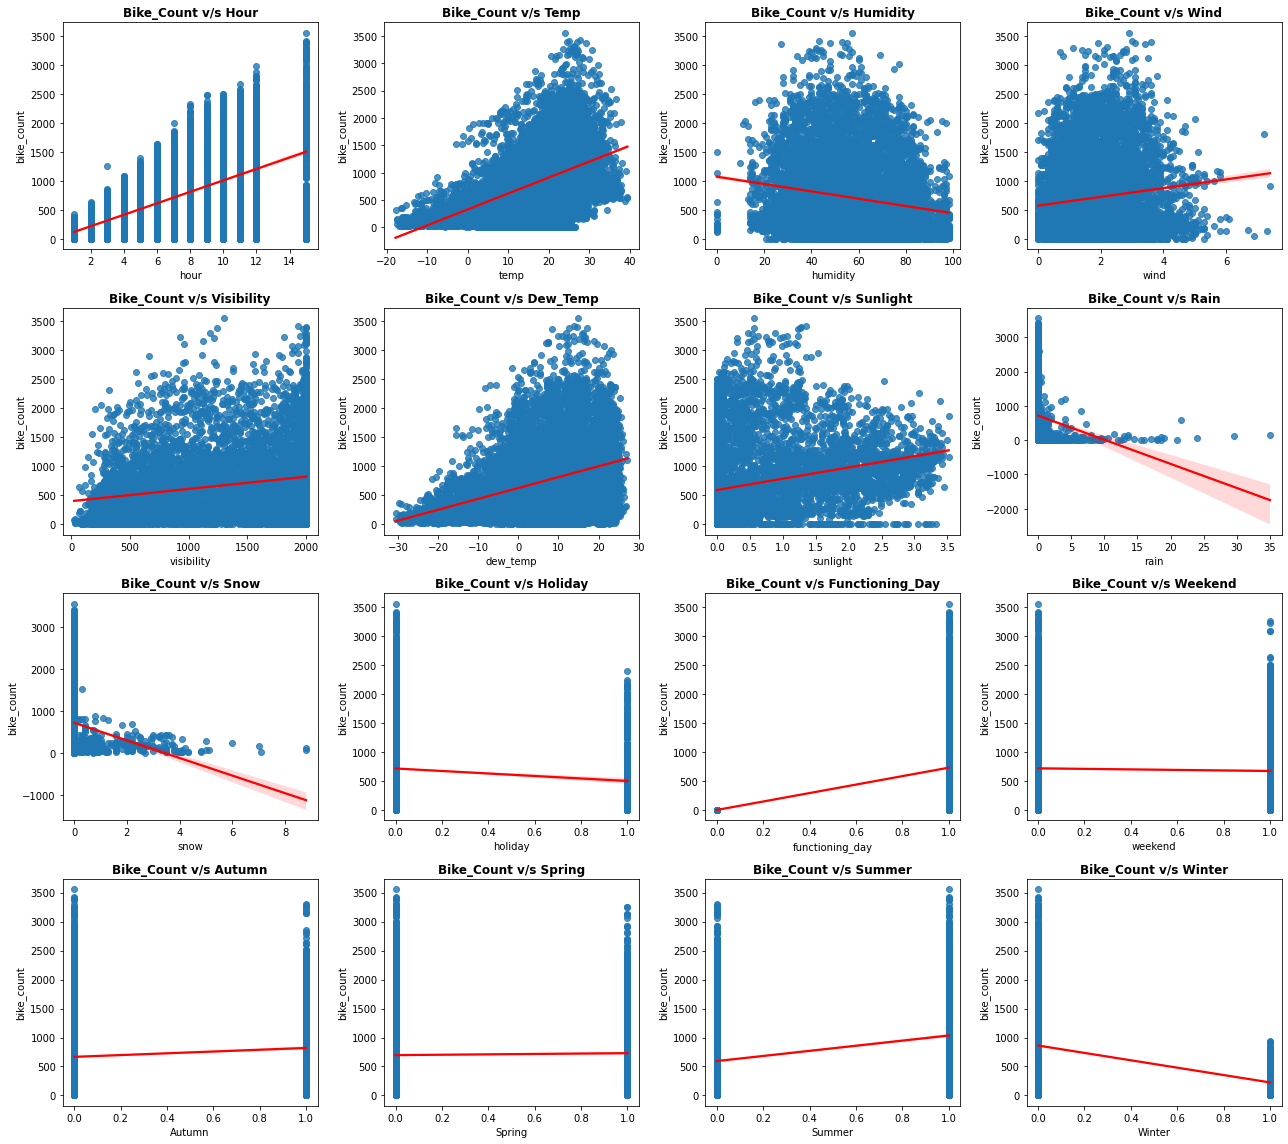

In [22]:
independent_variables = [i for i in df.columns if i not in ['bike_count']]

# Checking Linearity
plt.figure(figsize=(18,16))
for n,column in enumerate(independent_variables):
  plt.subplot(4, 4, n+1)
  sns.regplot(data = df, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

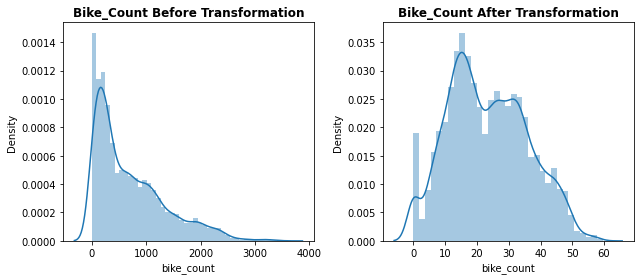

In [23]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['bike_count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['bike_count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()



##**Removing Multicolinearity**

In [24]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

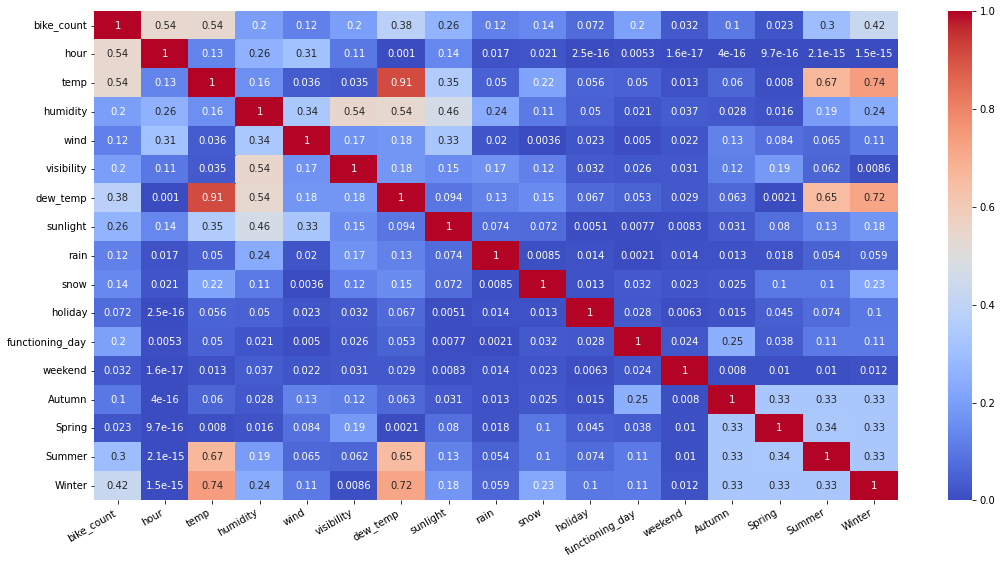

In [25]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

We can see some highly correlated features. Lets treat them either by combining or by dropping them by checking the variance inflation factors.

In [26]:
# Combibing Similar Features
df['overall_temp'] = 0.5*df['temp']+0.5*df['dew_temp']
df['day_type'] = df['functioning_day']-0.5*df['weekend']-0.5*df['holiday']

In [27]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['bike_count']]
calc_vif(df[independent_variables])

,variables,VIF
0,holiday,inf
1,temp,inf
2,overall_temp,inf
3,weekend,inf
4,functioning_day,inf
5,day_type,inf
6,dew_temp,inf
7,Summer,114.159262
8,Spring,110.725114
9,Autumn,108.740975


Since Summer and Winter can also be classified on the basis of temperature and we already have that feature present. Even if we drop these features the useful information will not be lost. So lets drop them.

In [28]:
# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df.columns if i not in ['bike_count','Winter','Summer','temp','dew_temp',
                                                            'weekend','holiday','functioning_day']]
calc_vif(df[independent_variables])

,variables,VIF
0,humidity,8.154585
1,day_type,6.917615
2,visibility,5.621974
3,hour,5.063178
4,wind,4.920916
5,overall_temp,2.241544
6,sunlight,2.170834
7,Autumn,1.563833
8,Spring,1.557126
9,snow,1.141756


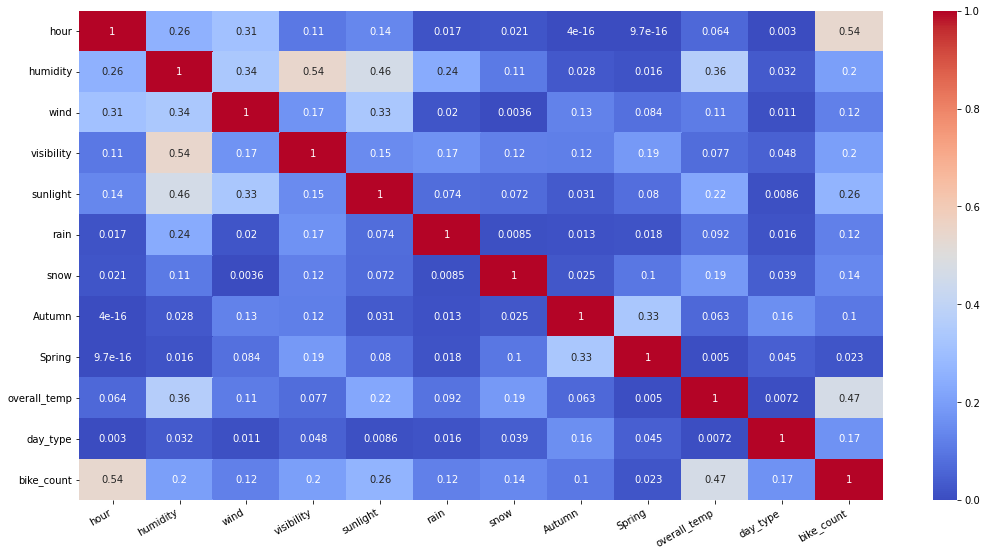

In [29]:
# Updating the dataset
dataset = df[independent_variables + ['bike_count']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

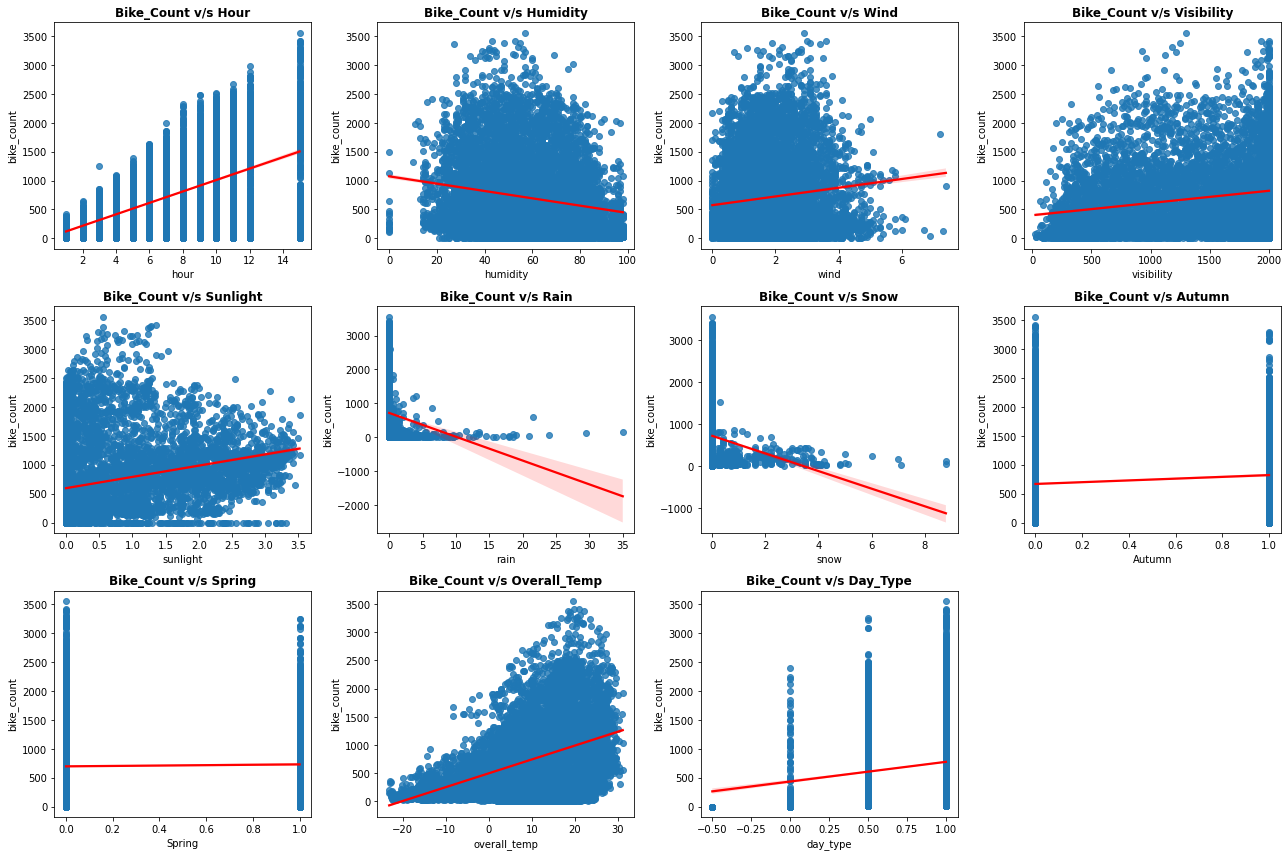

In [30]:
# Checking Linearity of the new dataset
plt.figure(figsize=(18,12))
for n,column in enumerate(independent_variables):
  plt.subplot(3, 4, n+1)
  sns.regplot(data = dataset, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [31]:
# Checking top 5 rows of the cleaned dataset
dataset.head()

,hour,humidity,wind,visibility,sunlight,rain,snow,Autumn,Spring,overall_temp,day_type,bike_count
0,5,37,2.2,2000,0.0,0.0,0.0,0,0,-11.40,1.0,254
1,4,38,0.8,2000,0.0,0.0,0.0,0,0,-11.55,1.0,204
2,3,39,1.0,2000,0.0,0.0,0.0,0,0,-11.85,1.0,173
3,2,40,0.9,2000,0.0,0.0,0.0,0,0,-11.90,1.0,107
4,1,36,2.3,2000,0.0,0.0,0.0,0,0,-12.30,1.0,78




#**Model building**

In [32]:
# Splitting the data into train and test
scaler = StandardScaler()
X = scaler.fit_transform(dataset[independent_variables])
y = np.sqrt(dataset['bike_count'])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

In [33]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Printing Evaluation Matrix
  print("MSE :" , mean_squared_error(a,p))
  print("RMSE :" ,np.sqrt(mean_squared_error(a,p)))
  print("MAE :" ,mean_absolute_error(a,p))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2_score(a,p))
  print("Adjusted R2 : ", 1-(1-r2_score(a,p))*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values
  plt.figure(figsize=(18,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

  return model

MSE : 151053.63826270122
RMSE : 388.6561954513285
MAE : 271.8408699355189
Train R2 : 0.6345552552783905
Test R2 : 0.639078887425033
Adjusted R2 :  0.6367972022305937


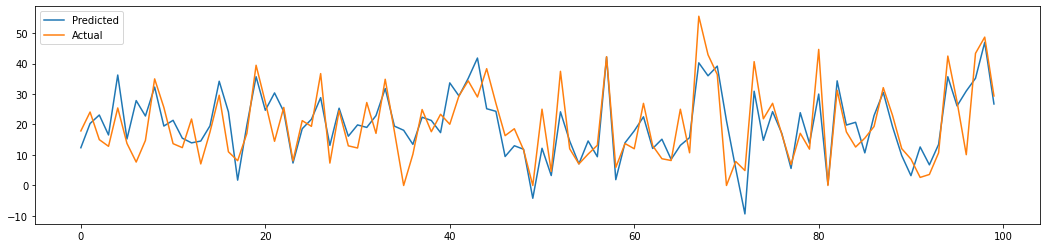

array([ 5.15855108, -3.6800019 , -0.6600163 ,  0.54943493, -0.15952181,
       -1.85923107, -0.10291487,  1.32666758,  0.93980169,  6.81128141,
        3.40174163])

In [34]:
# Fitting Linear Regression Model
lr = LinearRegression()
analyse_model(lr, X_train, X_test, y_train, y_test).coef_

In [56]:
# Random Forest Regressor GridSearch
grid_values = {'n_estimators':[50, 100, 200], 'max_depth':[15, 18, 20]}
rf = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring = 'r2', cv=5)
rf.fit(X_train, y_train).best_params_

{'max_depth': 20, 'n_estimators': 100}

MSE : 53841.181027805214
RMSE : 232.03702512272739
MAE : 138.75773296670138
Train R2 : 0.9803427044362968
Test R2 : 0.8713541813199478
Adjusted R2 :  0.8705409031558785


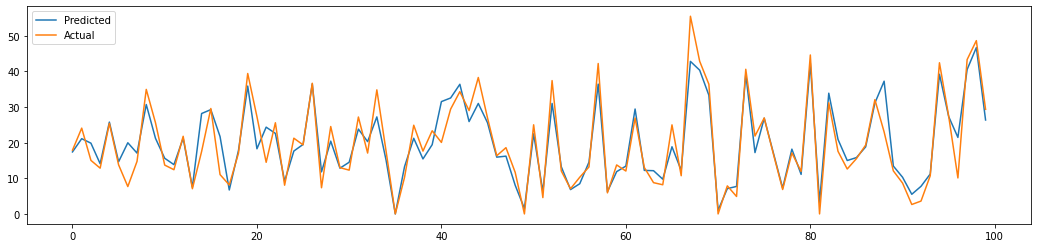

RandomForestRegressor(max_depth=20)

In [61]:
rf = RandomForestRegressor(max_depth=20, n_estimators=100)
analyse_model(rf, X_train, X_test, y_train, y_test)

In [48]:
# XGBoost Regressor GridSearch
grid_values = {'n_estimators':[50, 100, 200], 'max_depth':[8, 10, 12],'learning_rate':[0.05,0.08,0.1]}
xgb = GridSearchCV(XGBRegressor(silent=True), param_grid = grid_values, scoring = 'r2', cv=5)
xgb.fit(X_train, y_train).best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

MSE : 48302.23393204568
RMSE : 219.77769207097813
MAE : 132.0530063530412
Train R2 : 0.9848821988262946
Test R2 : 0.8845887049718619
Adjusted R2 :  0.8838590933366266


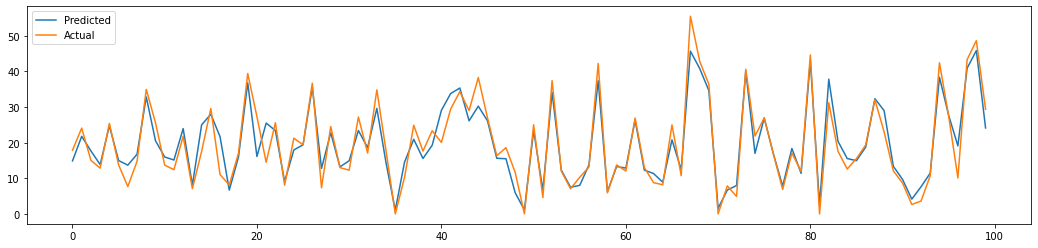

XGBRegressor(max_depth=8, n_estimators=200, silent=True)

In [49]:
xgb = XGBRegressor(max_depth=8, n_estimators=200, learning_rate=0.1,silent=True)
analyse_model(xgb, X_train, X_test, y_train, y_test)